## Example file:
## RSNN method apply on Transverse Field Ising Model

This file is a example & sample code of the application of the RSNN method on TFIM.
The basic functions are in the TFIM1D.py, including the generating function of TFIM Hamiltonain, Exact solution (JW transformation), ...etc. 


In [1]:
#import functions from TFIM1D 
from TFIM1D import *

## Basic parameters:
N_spin refer to the system size $(N)$ of the spin system.   
M is the basis number we choose to construct each sample matrix.  
N_s is the number of sample matrix ($N_s$ in paper).  
N_train_half is half of the number of training data ($N_{train}/2$).  
lh_ and rh_ are the parameter range of $\lambda$ count from left/right side. 

In [2]:
#Parameters
N_spin       = 8
M            = 10
N_s          = 20
N_train_half = 50 #Half of the training data number
lh_          = 0.3 #Parameter region for lhs
rh_          = 0.3 #Parameter region for rhs

#Using functions from ISING_1D class
#Data_gen -> A subclass specifing the data parameters
#training_data -> generate the training data
#testing_data -> generate the testing data

t1  = ISING_1D(N_spin = N_spin)
t1d = t1.Data_gen(N_spin                   = N_spin,
                  bases_per_sample         = M,
                  N_sample_matricies       = N_s,
                  N_training_data_per_side = N_train_half
                  )
tr_ = t1d.training_data(left_h = lh_, right_h = rh_)
ts_ = t1d.testing_data()




Shape of basis_set_data =
 (200, 8)

###____Training data generation start!____###

training_set LHS, Processing  0 / 50 , duration =  0.02822 s
training_set LHS, Processing  10 / 50 , duration =  0.26939 s
training_set LHS, Processing  20 / 50 , duration =  0.54344 s
training_set LHS, Processing  30 / 50 , duration =  0.9162 s
training_set LHS, Processing  40 / 50 , duration =  1.23924 s
training_set LHS, Processing  50 / 50 , duration =  1.50952 s
training_set RHS, Processing  0 / 50 , duration =  1.53712 s
training_set RHS, Processing  10 / 50 , duration =  1.82562 s
training_set RHS, Processing  20 / 50 , duration =  2.1515 s
training_set RHS, Processing  30 / 50 , duration =  2.51684 s
training_set RHS, Processing  40 / 50 , duration =  2.83004 s
training_set RHS, Processing  50 / 50 , duration =  3.13656 s

###____Training data generation end!____###


###____Result____###

Shape of training data set = 
 (102, 20, 10, 10)
Shape of training label set = 
 (102, 3)
Save training dat

In [3]:
#After generating the training and testing data, we use them to train a CNN.
#Loading generated data by DATA_PRO class 

trainD, ExactD, testD, ExactDtest = DATA_PRO.Load_data(
    tr_[0],tr_[1],ts_[0],ts_[1])

#Since we generate the data with sorted parameter, we need to randomize them to have better training performance

trainD_r,  ExactD_r = DATA_PRO.Indicies_Randomization(trainD,ExactD)

#Train the CNN with the function Train_CNN with data we described above 

res = \
    Train_CNN(
    trainD_r,
    ExactD_r,
    testD,
    ExactDtest,
    batch_size = 1,
    batch_num  = 100,
    epoch_num  = 100,
    Channel1   = 50,
    Channel2   = 10,
    betaa      = 0.001,
    N_of_sample = N_s,
    sample_size = M
    )


epoch = 100 / 100 ( 100.0 %) ,Batch = 1 / 100 ( 1.0 %) 
 train accuracy = 
 98.95247 %

 Prediction accuracy = 
 98.93816 %

 validation accuracy = 
 99.55006 %

 Cost = 
 0.065774575

 Validation Cost = 
 0.35394654
Duration : 359.38849997520447 s
tps : 0.06053614616394043 s
---------------------------------------------
batch_acc_avg = 99.08416152954102 %
decrease count =  0
---------------------------------------------
Saveing data to  Tue Nov 10 00:58:39 2020
Total execute time : 362.9851038455963 s


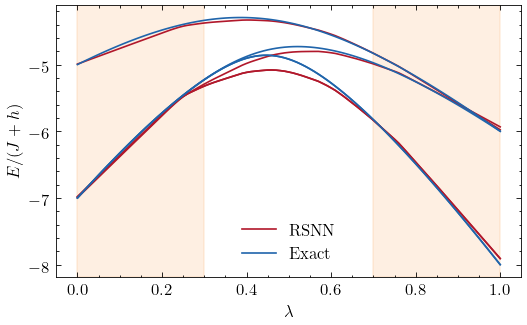

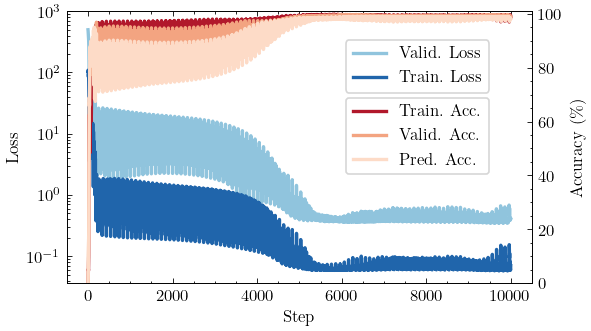

In [4]:
#Using the function plot_res to plot the result. 
#Note that this result is only for demo purpose, the accuracy can be increased by tunning hyper-parameters
#The package SciencePlots is needed for the plotting theme
plot_res(folder = res, rh = rh_, lh = lh_, ExactDtest = ExactDtest)